In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi

# Plot poles, interpolation nodes and equioscillation points
and re-use previously computed interpolation nodes

In [20]:
n = 12
tol = 1e-6

winit = rexpi.west(n,tol)
wfin = (n+0.5)*np.pi
ws = np.linspace(winit,wfin,20)
nw = len(ws)
inodes = np.zeros((2*n+1,nw))
eopoints = np.zeros((2*n+2,nw))
aprxerr = np.zeros(nw)
polesreal = np.zeros((n,nw))
polesimag = np.zeros((n,nw))
nodes_pos = None
usetol=1e-3

print("   |n = %d"%n)
print(" j |    w  |  brib                     |")
print("   |       | iter| rel.devi | error    | err.est.")
for (ij,w) in zip(range(len(ws)),ws):
    rx, info = rexpi.brib(w = w, n = n, tolequi = 1e-3, info=1, nodes_pos=nodes_pos)
    dev1 = info['dev']
    niter = info['iterations']
    
    errestnow = rexpi.errest(n,w)
    nodes_pos = info['ix']
    inodes[:n,ij] = nodes_pos
    eopoints[:n+1,ij] = info['eta']
    aprxerr[ij] = info['err']
    
    lams = rx.getpoles()
    ijxi = np.argsort(lams.imag)
    polesreal[:,ij], polesimag[:,ij] = lams.real[ijxi], lams.imag[ijxi]

    print("{:2d} |  {:4.1f} | {:3d} | {:.2e} | {:.2e} | {:.2e}".format(ij,w, niter,dev1, aprxerr[ij] , errestnow))

   |n = 12
 j |    w  |  brib                     |
   |       | iter| rel.devi | error    | err.est.
 0 |  20.6 |   6 | 3.51e-05 | 9.12e-07 | 1.00e-06
 1 |  21.6 |   3 | 5.73e-05 | 2.87e-06 | 3.21e-06
 2 |  22.6 |   3 | 7.42e-05 | 8.53e-06 | 9.34e-06
 3 |  23.5 |   3 | 1.04e-04 | 2.41e-05 | 2.70e-05
 4 |  24.5 |   3 | 1.47e-04 | 6.51e-05 | 7.44e-05
 5 |  25.5 |   3 | 2.12e-04 | 1.68e-04 | 1.95e-04
 6 |  26.5 |   3 | 3.09e-04 | 4.16e-04 | 4.85e-04
 7 |  27.5 |   3 | 7.25e-04 | 9.91e-04 | 1.16e-03
 8 |  28.5 |   4 | 4.85e-05 | 2.27e-03 | 2.64e-03
 9 |  29.4 |   4 | 8.11e-05 | 5.02e-03 | 5.81e-03
10 |  30.4 |   4 | 1.38e-04 | 1.07e-02 | 1.23e-02
11 |  31.4 |   4 | 2.41e-04 | 2.21e-02 | 2.53e-02
12 |  32.4 |   4 | 4.41e-04 | 4.41e-02 | 5.01e-02
13 |  33.4 |   4 | 8.41e-04 | 8.48e-02 | 9.55e-02
14 |  34.4 |   5 | 2.85e-04 | 1.57e-01 | 1.74e-01
15 |  35.3 |   6 | 2.52e-04 | 2.81e-01 | 3.03e-01
16 |  36.3 |   7 | 4.21e-04 | 4.79e-01 | 5.03e-01
17 |  37.3 |   9 | 7.41e-04 | 7.71e-01 | 7.97e-0

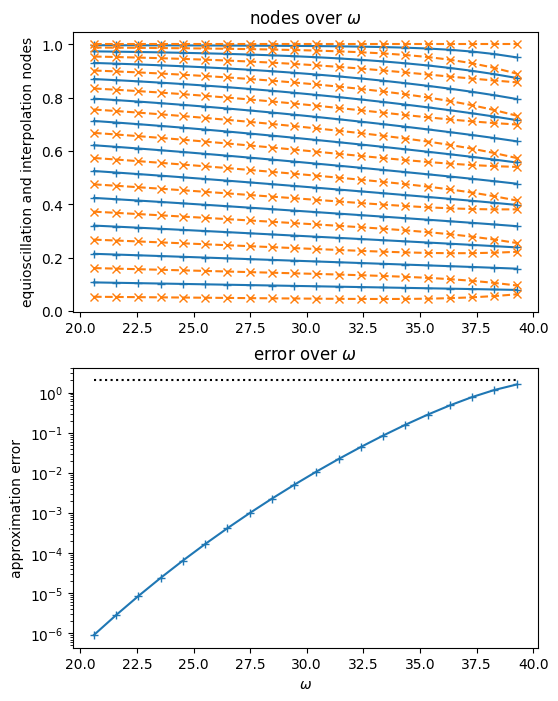

In [21]:
fig, axs = plt.subplots(2,1,figsize=(6,8))

# plot only positive interpolation nodes
for j in range(n):
    axs[0].plot(ws,inodes[j,:],'-+',markersize=6,color='C0')
for j in range(n+1):
    axs[0].plot(ws,eopoints[j,:],'--x',color='C1')
axs[0].title.set_text("nodes over $\omega$")
axs[0].set_ylabel("equioscillation and interpolation nodes")
axs[1].semilogy(ws,aprxerr,'-+')
axs[1].semilogy([ws[0],ws[-1]],[2,2],':k')
axs[1].title.set_text("error over $\omega$")
axs[1].set_ylabel("approximation error")
axs[1].set_xlabel("$\omega$");


plots poles for multiple values of w


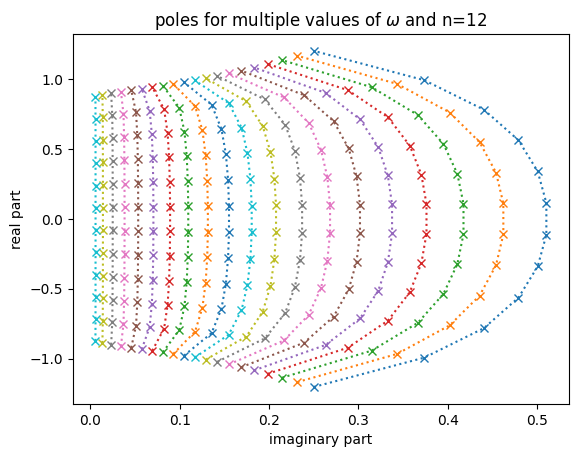

In [22]:
print("plots poles for multiple values of w")
for j in range(len(ws)):
    plt.plot(polesreal[:,j],polesimag[:,j],':x')
plt.title("poles for multiple values of $\omega$ and n={}".format(n))
plt.xlabel("imaginary part")
plt.ylabel("real part");


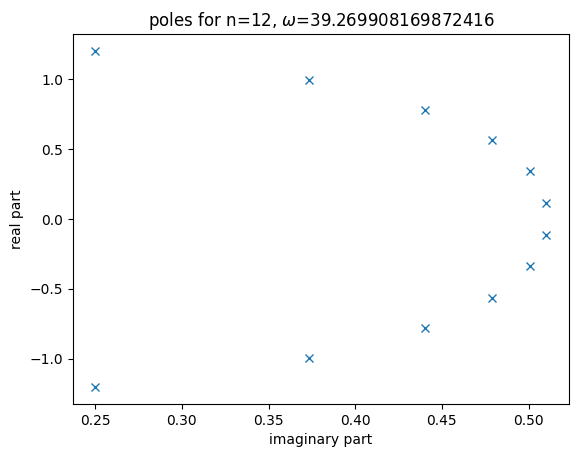

In [23]:
iw=0
plt.plot(polesreal[:,iw],polesimag[:,iw],'x');
plt.title("poles for n={}, $\omega$={}".format(n,w))
plt.xlabel("imaginary part")
plt.ylabel("real part");